### Необходимо составить программу на python, рисующую графики ошибок 1го и 2го рода для двух статистических гипотез (H0 и H1). Параметры распределения гипотез выбрать самостоятельно 

In [27]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

from ipywidgets import interact
from ipywidgets import IntSlider

plt.style.use('seaborn') 
plt.rcParams['figure.figsize'] = (12, 8)

In [28]:
def draw_errors(*, mu_0, sigma_0, mu_1, sigma_1, samples):
    
    #Draw PDF
    x0 = np.sort(np.random.normal(mu_0, sigma_0, samples))
    plt.plot(x0, stats.norm.pdf(x0, loc=mu_0, scale=sigma_0), label='H 0')
    
    x1 = np.sort(np.random.normal(mu_1, sigma_1, samples))
    plt.plot(x1, stats.norm.pdf(x1, loc=mu_1, scale=sigma_1), label='H 1')
    
    df = samples - 1 # Degrees of freedom
    type_1_color = 'red'
    type_2_color = 'grey'
    alpha = 0.5
    step = 0.01
    
    # type I error left    
    left_type_1 = stats.t.ppf(q=0.025, df=df)
    left_0 = min(x0)
    left_1 = left_type_1 * sigma_0 + mu_0   
    arr = np.arange(left_0, left_1, step)
    plt.fill_between(
        x=arr,
        y1=stats.norm.pdf(arr, loc=mu_0, scale=sigma_0),
        facecolor=type_1_color, alpha=alpha,
        label='Type I Error'
    )
    
    # type I error right
    right_type_1 = stats.t.ppf(q=0.975, df=df)
    right_0 = right_type_1 * sigma_0 + mu_0
    right_1 = max(x0)
    arr = np.arange(right_0, right_1, step)
    plt.fill_between(
        x=arr,
        y1=stats.norm.pdf(arr, loc=mu_0, scale=sigma_0),
        facecolor=type_1_color,
        alpha=alpha,
    )
    
    # type II error
    arr = np.arange(left_1, right_0, step)
    y1 = stats.norm.pdf(arr, loc=mu_1, scale=sigma_1)
    plt.fill_between(
        x=arr, 
        y1=y1, 
        facecolor=type_2_color, 
        alpha=alpha,
        label='Type II Error'
    )
    
    plt.legend();

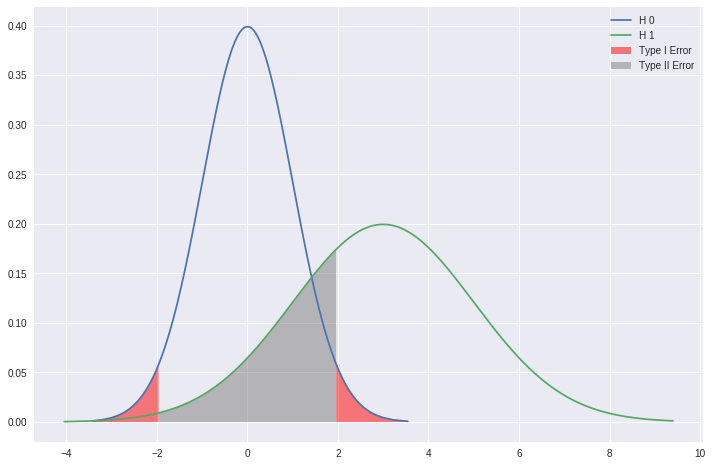

In [32]:
draw_errors(mu_0=0, sigma_0=1, mu_1=3, sigma_1=2, samples=5000)

In [30]:
interact(
    draw_errors,
    mu_0=IntSlider(min=-25, max=25, step=1, continuous_update=False, value=0),
    mu_1=IntSlider(min=-25, max=25, step=1, continuous_update=False, value=-9),
    sigma_0=IntSlider(min=1, max=25, step=1, continuous_update=False, value=5),
    sigma_1=IntSlider(min=1, max=25, step=1, continuous_update=False, value=4),
    samples=IntSlider(min=1000, max=10000, step=500, continuous_update=False, value=2000),
    continuous_update=False,
);

A Jupyter Widget